# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

# content
the dataset consists of several medical predictor variables and one target variable what it means "Outcome". 
Predict the number of pregnancies the patient consists Glucose, Insulin, age and so on.


# Objective.
The object of the dataset to predict whether or not the patient is diabetes or not. A machine learning model to predict whether or not the patient diadetes or not. 

In [2]:
#Number of times pregnant
#Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#Diastolic blood pressure (mm Hg)
#Triceps skin fold thickness (mm)
#2-Hour serum insulin (mu U/ml)
#Body mass index (weight in kg/(height in m)^2)
#Diabetes pedigree function
#Age (years)
#Class variable (0 or 1)

In [3]:
#Load diabetics.csv into a pandas dataFrame
data = pd.read_csv(r"C:\Users\ASHOK\Downloads\diabetics data.csv")

In [4]:
#veiw top 5 raws
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,66,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#how many data-points and features
data.shape

(1535, 9)

In [6]:
#What are the column names in our dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# How many data points for each class are present
# balanced-dataset vs imbalanced datasets
data["Outcome"].value_counts()

0    1000
1     535
Name: Outcome, dtype: int64

In [8]:
#veiw summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1535 non-null   int64  
 1   Glucose                   1535 non-null   int64  
 2   BloodPressure             1535 non-null   int64  
 3   SkinThickness             1535 non-null   int64  
 4   Insulin                   1535 non-null   int64  
 5   BMI                       1535 non-null   float64
 6   DiabetesPedigreeFunction  1535 non-null   float64
 7   Age                       1535 non-null   int64  
 8   Outcome                   1535 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.1 KB


In [9]:
#veiw descriptive statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,3.882736,120.876873,69.103583,20.527036,79.851466,31.991531,0.471775,33.229967,0.348534
std,3.723572,31.965122,19.355666,15.947940,115.225979,7.884053,0.331305,11.752439,0.476661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.626000,41.000000,1.000000
max,66.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data["Pregnancies"].unique()

array([66,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13,  6, 15, 17, 12,
       14], dtype=int64)

In [11]:
len(data["Glucose"].unique())

136

In [12]:
len(data["BloodPressure"].unique())

47

In [13]:
len(data["SkinThickness"].unique())

51

In [14]:
len(data["Insulin"].unique())

186

In [15]:
len(data["BMI"].unique())

248

In [16]:
len(data["DiabetesPedigreeFunction"].unique())

517

In [17]:
len(data["Age"].unique())

52

# Checking  Null values
we have no null values.

In [18]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

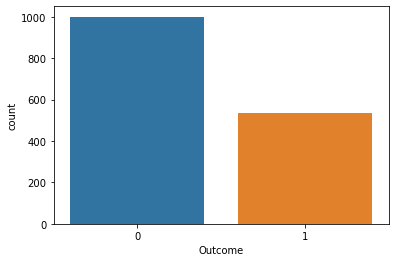

Number of data points in class 1   535 , ( 34.85342019543974 %)
Number of data points in class 0   1000 , ( 65.14657980456026 %)


In [155]:
sns.countplot(data["Outcome"], data=data)
plt.show()

y_value_counts = data['Outcome'].value_counts()
print("Number of data points in class 1  ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of data points in class 0  ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")



In [19]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,66,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


<AxesSubplot:xlabel='Glucose', ylabel='Age'>

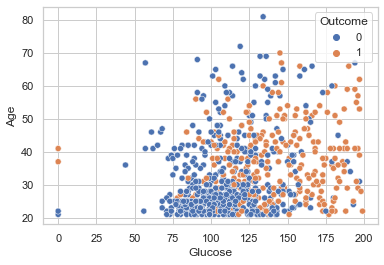

In [25]:
sns.set(style = "whitegrid")
sns.scatterplot(x = "Glucose", y = "Age", data = data, hue = "Outcome")

# Check outliers

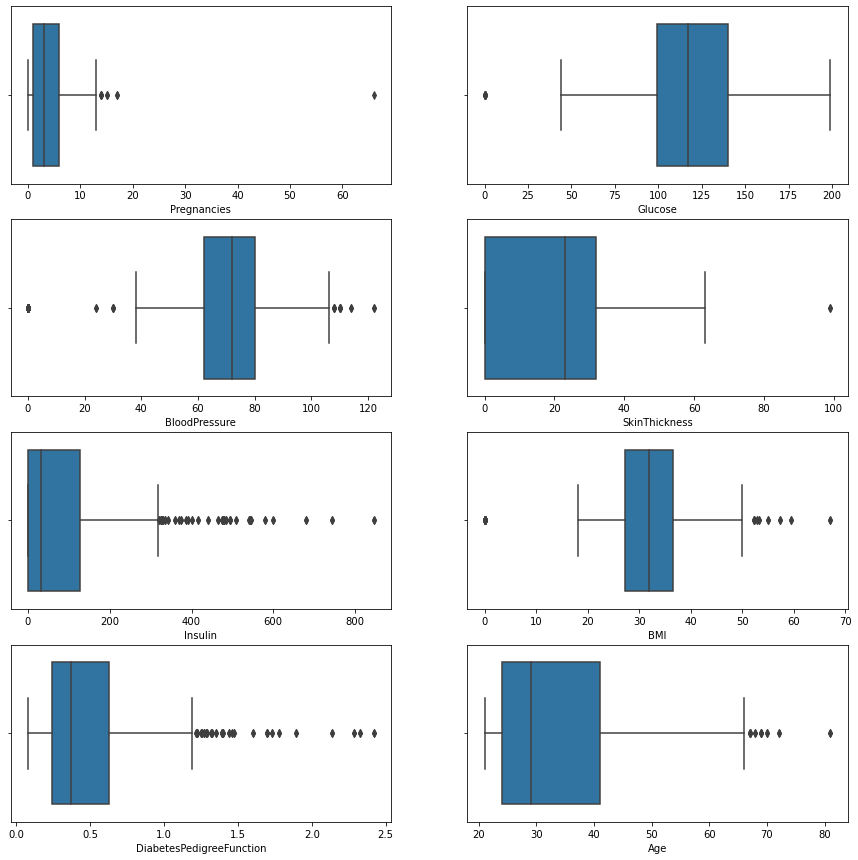

In [156]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data)
plt.show()

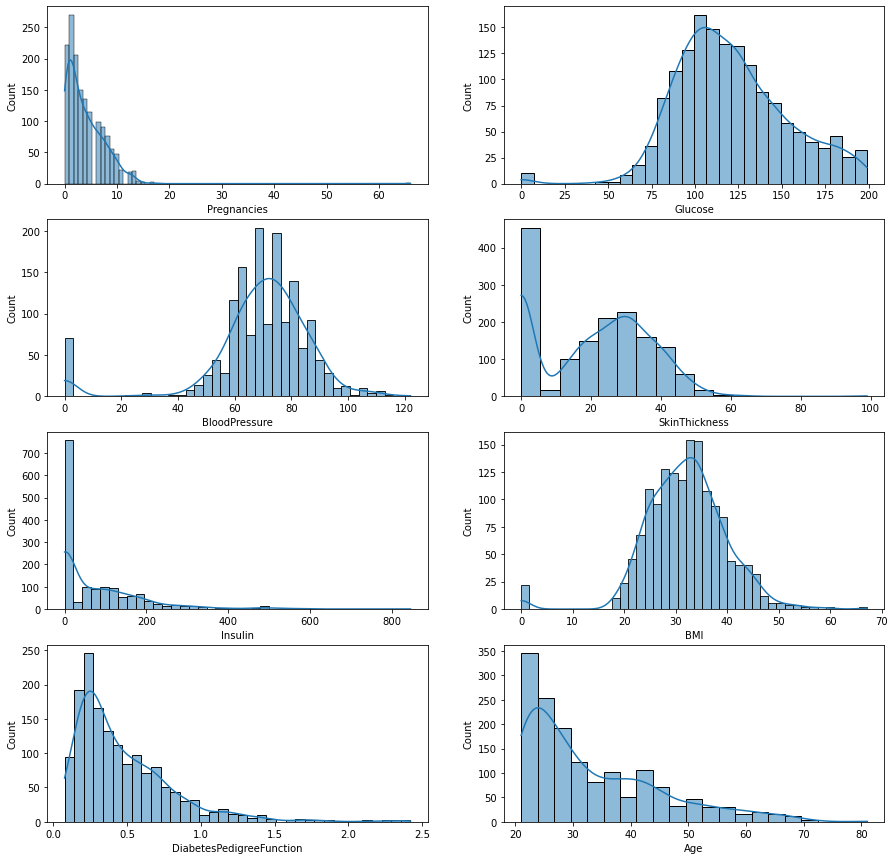

In [157]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,2,i+1)
    sns.histplot(x = col, data = data, kde = True)
plt.show()

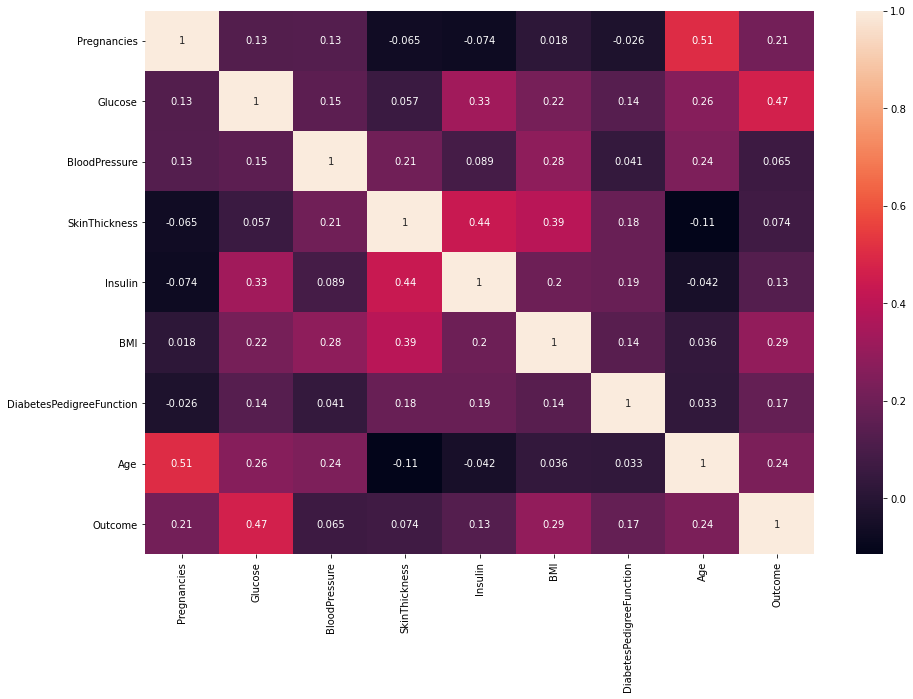

In [161]:
plt.figure(figsize = (15,10))
corr = data.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [192]:
corr['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466219
BMI                         0.292695
Age                         0.237389
Pregnancies                 0.214766
DiabetesPedigreeFunction    0.173545
Insulin                     0.131265
SkinThickness               0.074010
BloodPressure               0.064975
Name: Outcome, dtype: float64

# Separate Independant variables and dependent variables

In [163]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome'].values

# StandardScaler

In [164]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.23, stratify = y)

In [166]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1181, 8) (1181,)
(354, 8) (354,)


# Machanics of the model

In [172]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [180]:
# Checking for Overfitting or Underfitting the data
RF_pred_train = RF.predict(X_train)
print("train accuraty is:",accuracy_score(RF_pred_train, y_train))
RF_pred_test = RF.predict(X_test)
print("test accuraty is:",accuracy_score(RF_pred_test, y_test))


train accuraty is: 0.9932260795935648
test accuraty is: 0.9265536723163842


In [190]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score
RF_pred_test = RF.predict(X_test)

print("recall_score :",recall_score(RF_pred_test, y_test))
print("Number of missclassified point :", np.count_nonzero((RF.predict(X_test)- y_test))/y_test.shape[0])


recall_score : 0.9145299145299145
Number of missclassified point : 0.07344632768361582


In [183]:
cn = confusion_matrix(RF_pred_test, y_test)

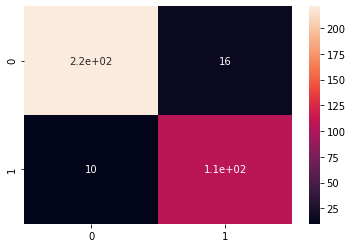

In [185]:
sns.heatmap(cn, annot = True)
plt.show()

In [187]:
precision_score(RF_pred_test, y_test)

0.8699186991869918

In [2]:
for i in range (0,10):
    if i%2 != 0:
        print(i)
            #return i

1
3
5
7
9
